In [235]:
# Import needed libraries
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

In [236]:
# Read and assign files to variables
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [237]:
# Display the first 5 rows of train.csv
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [238]:
# train.csv dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [239]:
# List of stats on train.csv
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [242]:
# Training extraction processes
# Convert from categorical variables into dummy variables and drop columns
df = df.drop(['Name', 'Cabin', 'Ticket'], axis=1)
df = df.dropna(subset=['Embarked'], how='all')
dum = pd.get_dummies(df)
dum = dum.drop(['Sex_female', 'Embarked_C'], axis=1)
y = dum['Survived']
X = dum.drop('Survived', axis=1)

In [243]:
# Random Forest Classification and pipeline setup
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
rfc = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100, random_state=1)
steps = [('imputation', imputer), ('random_forest', rfc)]
pipeline = Pipeline(steps)

In [ ]:
# Create and store into test csv files for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

In [ ]:
# Fit the model
model = pipeline.fit(X_train, y_train)

In [244]:
# Read and assign files to variables
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

In [ ]:
# Drop columns from X_test and y_test
X_test.drop(X_test.columns[[0]], axis=1, inplace=True)
y_test.drop(y_test.columns[[0]], axis=1, inplace=True)
X_test.drop(X_test.index[0], inplace=True)

In [245]:
# Scoring extraction processes
# Convert from categorical variables into dummy variables and drop columns
df = df.drop(['PassengerId'], axis=1)
dum = pd.get_dummies(df)
dum = dum.drop(['Sex_female', 'Embarked_C'], axis=1)
y_pred = model.predict(X_test)
test_pred = model.predict(df_dum)
class_report = classification_report(y_test, y_pred)

In [246]:
# Display outputs
print("Model confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------")
print("Classification Report:\n\n", class_report)
print("--------------------------------------------------------------------------")
print("Accuracy score:\n", metrics.accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------")
print("Predictions:\n", format(test_pred))

Model confusion matrix:
 [[145  21]
 [ 33  67]]
--------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

          0       0.81      0.87      0.84       166
          1       0.76      0.67      0.71       100

avg / total       0.79      0.80      0.79       266

--------------------------------------------------------------------------
Accuracy score:
 0.796992481203
--------------------------------------------------------------------------
Predictions:
 [0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1

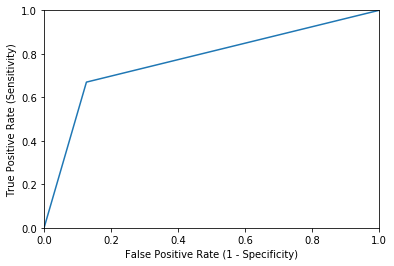

In [247]:
# Plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [248]:
# Calculate AUC
print(metrics.roc_auc_score(y_test, y_pred))

0.771746987952


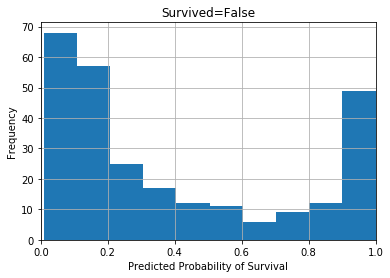

In [249]:
# Plot model prediction
y_pred = model.predict_proba(X_test)[:, 1]
labels_preds = pd.DataFrame({'label': y_test, 'pred_prob': y_pred})
axs = labels_preds.hist( column='pred_prob', sharex=True)
for i, axis in enumerate(axs):
    axis[0].set_title('Survived=' + str(bool(i)))
    axis[0].set_xlim(0, 1)
    axis[0].set_xlabel('Predicted Probability of Survival')
    axis[0].set_ylabel('Frequency')
plt.show()